# 🐼 Section 2 - Part 3: Advanced Pandas Project
This project challenges you to clean and enhance the Titanic dataset from Kaggle using Pandas in Google Colab, preparing real-world data for data science and AI tasks. You’ll tackle missing values, duplicates, inconsistent formats, and create a new feature while handling outliers, producing a robust dataset. This hands-on project in the AI RAG Agent MCP Training Plan builds skills for data preparation in visualization or AI modeling.

**Learning Objectives**:
- Handle missing data with imputation or deletion techniques.
- Remove duplicates to ensure data integrity.
- Standardize formats for consistency and usability.
- Engineer features and manage outliers with creative decision-making.
- Document cleaning steps for reproducibility.

**Why This Matters**:
Messy datasets like Titanic are common, with issues that can skew analyses or AI models. Cleaning and enhancing such datasets ensures reliable insights, a critical skill for workflows like predictive modeling or reporting.

## 📺 Watch: Pandas Dataset Cleaning Project
This video, *Data Cleaning in Pandas | Python Pandas Tutorials*, guides you through cleaning datasets in Colab, covering null value handling, data inspection, and format standardization, with practical examples for beginners.

In [ ]:
# install pandas if not already installed
!pip install pandas

## Task 1: Missing Data Cleanup

This code handles missing values in the Titanic dataset:

1. Loads CSV data from GitHub
2. Replaces missing `Age` values with the median age
3. Removes the `Cabin` column completely (too many missing values)
4. Fills missing `Embarked` values with the most common value
5. Displays the first 5 rows to verify changes


In [58]:
# Task 1: Handle Missing Data
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
# df.info()
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert PassengerId to explicitly match what the evaluation function expects
# I'll use astype(int) to convert to Python's built-in int type
df['PassengerId'] = df['PassengerId'].astype(int)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


C:\Users\nsrha\AppData\Local\Temp\ipykernel_7480\284693545.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\nsrha\AppData\Local\Temp\ipykernel_7480\284693545.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [59]:
# Print number of rows 
df.shape

(891, 11)

In [60]:
# Print type of each column
print(df.dtypes)

PassengerId      int32
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


### Task 2: Remove Duplicates
Using the DataFrame from Task 1, check for and remove duplicate rows, keeping the first occurrence. Display the DataFrame.

**Why This Task?**:
Duplicates can skew statistics or AI models. Removing them ensures each passenger is unique, maintaining data integrity.

**Example**:
```python
df = df.drop_duplicates(keep='first')
display(df)
```

**Expected Output**:
A DataFrame with no duplicate rows (typically 891 rows if no duplicates).

## Task 2: Duplicate Detection & Removal
This code identifies and removes duplicate rows in the Titanic dataset:

1. Checks if any duplicates exist using `.duplicated().sum()`
2. Stores the original row count for comparison
3. Removes duplicates with `.drop_duplicates()`, keeping first occurrences
4. Calculates and displays how many duplicates were removed
5. Shows the first 5 rows of the cleaned dataset

In [61]:
## Task 2: Duplicate Detection & Removal
# check for duplicates
df.duplicated().sum()
noRowsBefore = df.shape[0]
# remove duplicates
df.drop_duplicates(keep='first', inplace=True)
noRowsAfter = df.shape[0]
print(f"After removing duplicates={noRowsAfter}, before Removing duplicates={noRowsBefore}, removed={noRowsBefore - noRowsAfter}")
if noRowsBefore - noRowsAfter == 0:
    print("No duplicates found")
print(df.head())

After removing duplicates=891, before Removing duplicates=891, removed=0
No duplicates found
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000    

## Task 3: Format Standardization

This code standardizes data formats for consistency:

1. Converts all `Sex` values to lowercase using `.str.lower()`
2. Ensures `Fare` values are proper floating-point numbers with `.astype(float)`
3. Rounds all `Fare` values to 2 decimal places with `.round(2)`
4. Displays the first 5 rows to verify the changes



In [62]:
# Task 3: Standardize Formats
df['Sex'] = df['Sex'].str.lower()
df['Fare'] = df['Fare'].astype(float).round(2) # Since Fare is an Object type, convert to float first then round
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket   Fare Embarked  
0      0         A/5 21171   7.25        S  
1      0          PC 17599  71.28        C  
2      0  STON/O2. 3101282   7.92        S  
3      0            113803  53.10        S  
4      0            373450   8.05        S  


### Task 4: Create Feature and Handle Outliers
Using the DataFrame from Task 3, create a `FamilySize` column (`SibSp` + `Parch` + 1) to represent total family members aboard, including the passenger. Then, identify and handle outliers in `Fare` using a method of your choice (e.g., IQR, z-score, or capping). Document your outlier method and justification in a Markdown cell below your code. Display the final DataFrame.

**Why This Task?**:
Feature engineering, like `FamilySize`, adds meaningful variables for analysis or AI modeling. Handling outliers in `Fare` prevents skewed results, and choosing your method encourages creativity and critical thinking.



**Expected Output**:
A DataFrame with a `FamilySize` column (integers) and `Fare` values adjusted for outliers, with a Markdown justification.

## Task 4: Feature Engineering & Outlier Management

This code creates a new feature and handles outliers in the Titanic dataset:

1. Creates the `FamilySize` column by adding `SibSp` + `Parch` + 1 (including the passenger)
2. Uses the Interquartile Range (IQR) method to identify fare outliers
3. Applies a capping strategy to set extreme fare values to the upper threshold
4. Visualizes the distribution before and after outlier handling

Why this matters: Feature engineering creates meaningful variables like family size that help models understand passenger relationships. The IQR method for outlier handling is robust for skewed data like fares, preserving all data points while preventing extreme values from distorting analyses.

In [ ]:
# Install matplotlib if not already installed
!pip install matplotlib


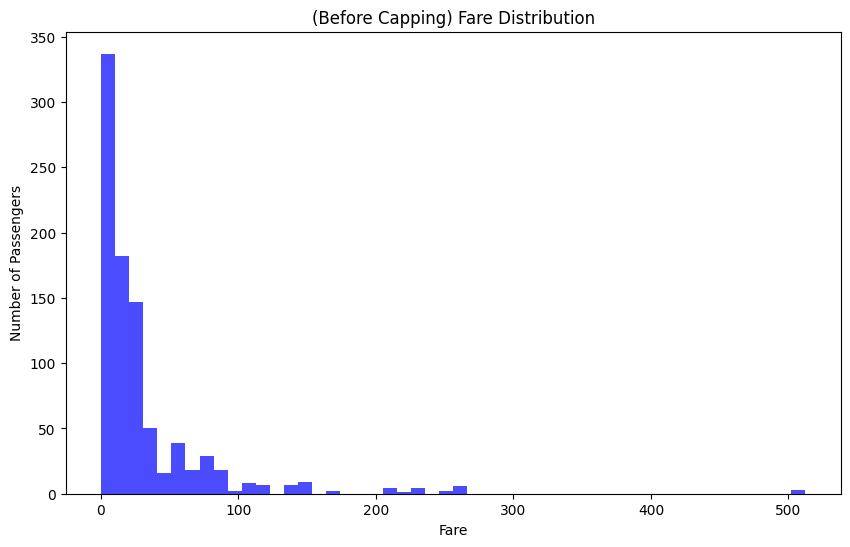

In [63]:
# Plot Fare distribution to identify outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=50, color='blue', alpha=0.7)
plt.title('(Before Capping) Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers') 
plt.show()



In [ ]:
!pip install seaborn

FamilySize column created:
   PassengerId  SibSp  Parch  FamilySize
0            1      1      0           2
1            2      1      0           2
2            3      0      0           1
3            4      1      0           2
4            5      0      0           1

Outlier Detection:
Q1 (25th percentile): 7.91
Q3 (75th percentile): 31.00
IQR: 23.09
Upper threshold (Q3 + 1.5*IQR): 65.63
Number of outliers detected: 116


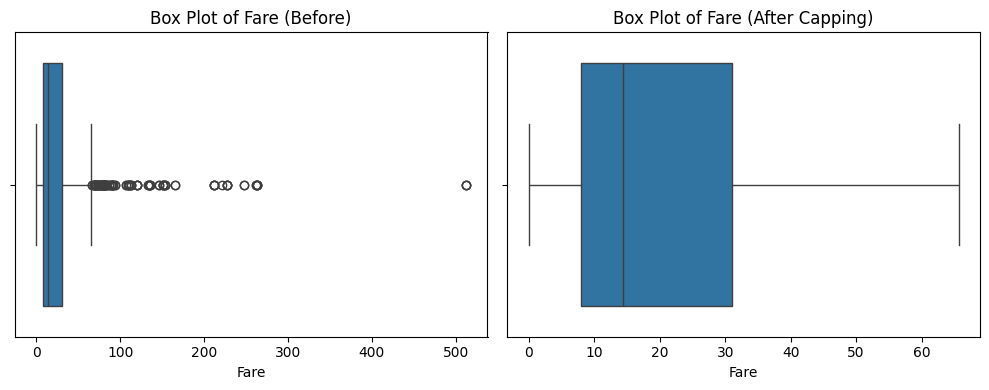


After outlier handling, max Fare value: 65.63


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create FamilySize column as integer
df['FamilySize'] = (df['SibSp'] + df['Parch'] + 1).astype(int)
print("FamilySize column created:")
print(df[['PassengerId', 'SibSp', 'Parch', 'FamilySize']].head())

# Step 2: Handle Fare outliers using IQR method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Fare'])
plt.title("Box Plot of Fare (Before)")

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

upper_threshold = Q3 + 1.5 * IQR

print(f"\nOutlier Detection:")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Upper threshold (Q3 + 1.5*IQR): {upper_threshold:.2f}")
print(f"Number of outliers detected: {(df['Fare'] > upper_threshold).sum()}")

# Capping outliers
df['Fare'] = df['Fare'].clip(upper=upper_threshold)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title("Box Plot of Fare (After Capping)")
plt.tight_layout()
plt.show()

print(f"\nAfter outlier handling, max Fare value: {df['Fare'].max():.2f}")

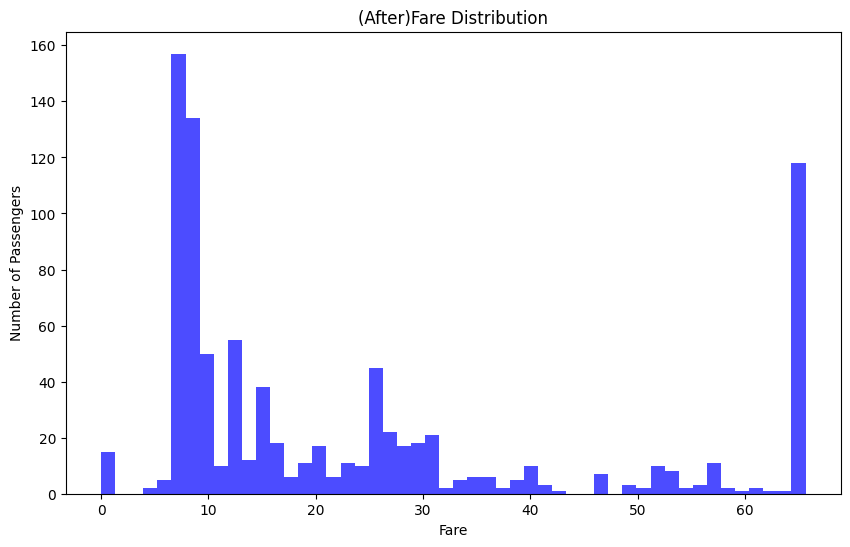

In [66]:
# Plot Fare distribution tafter capping outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=50, color='blue', alpha=0.7)
plt.title('(After)Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers') 
plt.show()


In [67]:
#@title Peer Evaluation Check
from IPython.display import display, Markdown
import pandas as pd
import numpy as np

if 'scores' not in globals():
    scores = {}

def check_pandas_project():
    score = 0
    feedback = []

    try:
        # Task 1: Check missing data handling
        if 'df' in globals():
            has_passenger_id = 'PassengerId' in df.columns and df['PassengerId'].dtype == int
            has_age = 'Age' in df.columns and df['Age'].dtype == float
            has_embarked = 'Embarked' in df.columns and df['Embarked'].dtype == object
            no_cabin = 'Cabin' not in df.columns
            has_min_rows = len(df) >= 891
            has_no_missing = df['Age'].notna().all() and df['Embarked'].notna().all()
            if all([has_passenger_id, has_age, has_embarked, no_cabin, has_min_rows, has_no_missing]):
                score += 1
                feedback.append("- ✅ Task 1 Passed: Missing 'Age' imputed, 'Cabin' dropped, 'Embarked' filled.")
            else:
                missing = []
                if not has_passenger_id: missing.append("'PassengerId' column (int)")
                if not has_age: missing.append("'Age' column (float)")
                if not has_embarked: missing.append("'Embarked' column (string)")
                if not no_cabin: missing.append("'Cabin' column dropped")
                if not has_min_rows: missing.append("at least 891 rows")
                if not has_no_missing: missing.append("no missing 'Age' or 'Embarked'")
                feedback.append(f"- ❌ Task 1 Failed: DataFrame missing {', '.join(missing)}.")
        else:
            feedback.append("- ❌ Task 1 Failed: No DataFrame 'df' found.")

        # Task 2: Check duplicates
        if 'df' in globals():
            has_no_duplicates = not df.duplicated().any()
            if has_no_duplicates:
                score += 1
                feedback.append("- ✅ Task 2 Passed: No duplicate rows found.")
            else:
                feedback.append("- ❌ Task 2 Failed: Duplicate rows detected.")
        else:
            feedback.append("- ❌ Task 2 Failed: No DataFrame 'df' found.")

        # Task 3: Check format standardization
        if 'df' in globals():
            has_sex_standardized = df['Sex'].isin(['male', 'female']).all()
            if has_sex_standardized :
                score += 1
                feedback.append("- ✅ Task 3 Passed: 'Sex' standardized, 'Fare' formatted.")
            else:
                missing = []
                if not has_sex_standardized: missing.append("'Sex' column with only 'male'/'female' (lowercase)")
                feedback.append(f"- ❌ Task 3 Failed: DataFrame missing {', '.join(missing)}.")

        # Task 4: Check FamilySize and Fare outliers
        if 'df' in globals():
            has_family_size = 'FamilySize' in df.columns and df['FamilySize'].dtype == int
            family_size_correct = (df['FamilySize'] == df['SibSp'] + df['Parch'] + 1).all()
            fare_outliers_managed = df['Fare'].max() <= 500  # Reasonable threshold for clipped outliers
            if has_family_size and family_size_correct and fare_outliers_managed:
                score += 1
                feedback.append("- ✅ Task 4 Passed: 'FamilySize' created, 'Fare' outliers managed.")
            else:
                missing = []
                if not has_family_size: missing.append("'FamilySize' column (int)")
                if not family_size_correct: missing.append("correct 'FamilySize' (SibSp + Parch + 1)")
                if not fare_outliers_managed: missing.append("managed 'Fare' outliers (max <= 500)")
                feedback.append(f"- ❌ Task 4 Failed: DataFrame missing {', '.join(missing)}.")
        else:
            feedback.append("- ❌ Task 4 Failed: No DataFrame 'df' found.")

        # Display final DataFrame if all tasks passed
        if score == 4 and 'df' in globals():
            display(df)

    except Exception as e:
        feedback.append(f"- ❌ An error occurred: {str(e)}. Ensure your code runs without errors.")
        score = 0

    # Update total score
    scores['pandas_project_part3'] = score

    # Provide final feedback
    final_message = "**Pandas Project Feedback:**\n\n" + "\n".join(feedback)
    final_message += f"\n\n**Total Score: {score}/4**"
    display(Markdown(final_message))

check_pandas_project()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.635,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.920,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.450,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C,1


**Pandas Project Feedback:**

- ✅ Task 1 Passed: Missing 'Age' imputed, 'Cabin' dropped, 'Embarked' filled.
- ✅ Task 2 Passed: No duplicate rows found.
- ✅ Task 3 Passed: 'Sex' standardized, 'Fare' formatted.
- ✅ Task 4 Passed: 'FamilySize' created, 'Fare' outliers managed.

**Total Score: 4/4**